In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
df1 = pd.read_csv(r"C:\Users\Padma Jothi\Desktop\Capstone\Singapore Resale\ResaleFlatPrices-19901999.csv")
df2 = pd.read_csv(r"C:\Users\Padma Jothi\Desktop\Capstone\Singapore Resale\ResaleFlatPrices-2000Feb2012.csv")
df3 = pd.read_csv(r"C:\Users\Padma Jothi\Desktop\Capstone\Singapore Resale\ResaleFlatPrices-Mar2012toDec2014.csv")
df4 = pd.read_csv(r"C:\Users\Padma Jothi\Desktop\Capstone\Singapore Resale\ResaleFlatPrices-Jan2015toDec2016.csv")
df5 = pd.read_csv(r"C:\Users\Padma Jothi\Desktop\Capstone\Singapore Resale\Resaleflatprices-Jan2017onwards.csv")

In [3]:
new_df = pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

In [4]:
new_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
927764,2024-05,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,Maisonette,1988,948000.0,62 years 09 months
927765,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62 years 08 months
927766,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,1000000.0,62 years 08 months
927767,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62 years 11 months


In [5]:
new_df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

In [6]:
new_df.shape

(927769, 11)

In [7]:
new_df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [8]:
new_df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

In [9]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,927769.0,95.690326,25.824063,28.0,73.0,93.0,113.0,307.0
lease_commence_date,927769.0,1988.281130,10.668351,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,927769.0,320938.295228,170599.383121,5000.0,193000.0,298000.0,418000.0,1588000.0


In [10]:
new_df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [11]:
new_df['remaining_lease'].nunique()

726

## Feature Enginnering

In [12]:
#Splitting the month column by years and months
new_df[['resale_years','resale_months']] = new_df['month'].str.split('-',expand=True)

new_df['resale_years'] = new_df['resale_years'].astype(int)
new_df['resale_months'] = new_df['resale_months'].astype(int)

In [13]:
#Splitting the storey_range column from start and end
new_df[['start_storey_range', 'end_storey_range']] = new_df['storey_range'].str.split(' TO ', expand=True)

new_df['start_storey_range'] = new_df['start_storey_range'].astype(int)
new_df['end_storey_range'] = new_df['end_storey_range'].astype(int)

In [14]:
new_df[['remaining_lease_years', 'remaining_lease_months']] = new_df['remaining_lease'].str.extract(r'(\d+) years (\d+) months')

new_df['remaining_lease_years'] = pd.to_numeric(new_df['remaining_lease_years'], errors='coerce')
new_df['remaining_lease_months'] = pd.to_numeric(new_df['remaining_lease_months'], errors='coerce')
new_df['block'] = pd.to_numeric(new_df['block'],errors='coerce')

In [15]:
new_df.drop(columns=['remaining_lease','block','month','storey_range'],inplace=True)
new_df.head()

,town,flat_type,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_years,resale_months,start_storey_range,end_storey_range,remaining_lease_years,remaining_lease_months
0,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,1990,1,10,12,NaN,NaN
1,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,1990,1,4,6,NaN,NaN
2,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,1990,1,10,12,NaN,NaN
3,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,1990,1,7,9,NaN,NaN
4,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,1990,1,4,6,NaN,NaN


## Fill Null values

In [16]:
median_remaining_lease_years = new_df['remaining_lease_years'].median()
new_df['remaining_lease_years'].fillna(median_remaining_lease_years, inplace=True)

In [17]:
median_remaining_lease_months = new_df['remaining_lease_months'].median()
new_df['remaining_lease_months'].fillna(median_remaining_lease_months, inplace=True)
new_df.head()

,town,flat_type,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_years,resale_months,start_storey_range,end_storey_range,remaining_lease_years,remaining_lease_months
0,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,1990,1,10,12,74.0,7.0
1,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,1990,1,4,6,74.0,7.0
2,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,1990,1,10,12,74.0,7.0
3,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,1990,1,7,9,74.0,7.0
4,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,1990,1,4,6,74.0,7.0


In [18]:
new_df.isnull().sum()

town                      0
flat_type                 0
street_name               0
floor_area_sqm            0
flat_model                0
lease_commence_date       0
resale_price              0
resale_years              0
resale_months             0
start_storey_range        0
end_storey_range          0
remaining_lease_years     0
remaining_lease_months    0
dtype: int64

In [19]:
new_df.isnull().sum()

town                      0
flat_type                 0
street_name               0
floor_area_sqm            0
flat_model                0
lease_commence_date       0
resale_price              0
resale_years              0
resale_months             0
start_storey_range        0
end_storey_range          0
remaining_lease_years     0
remaining_lease_months    0
dtype: int64

In [20]:
new_df = new_df[['resale_years','resale_months' , 'town', 'flat_type','street_name','floor_area_sqm', 'flat_model', 'lease_commence_date', 'start_storey_range', 'end_storey_range' , 'remaining_lease_years','remaining_lease_months', 
                 'resale_price']]
new_df.head()

,resale_years,resale_months,town,flat_type,street_name,floor_area_sqm,flat_model,lease_commence_date,start_storey_range,end_storey_range,remaining_lease_years,remaining_lease_months,resale_price
0,1990,1,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,1977,10,12,74.0,7.0,9000.0
1,1990,1,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,1977,4,6,74.0,7.0,6000.0
2,1990,1,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,1977,10,12,74.0,7.0,8000.0
3,1990,1,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,1977,7,9,74.0,7.0,6000.0
4,1990,1,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,4,6,74.0,7.0,47200.0


In [21]:
new_df.dtypes

resale_years                int32
resale_months               int32
town                       object
flat_type                  object
street_name                object
floor_area_sqm            float64
flat_model                 object
lease_commence_date         int64
start_storey_range          int32
end_storey_range            int32
remaining_lease_years     float64
remaining_lease_months    float64
resale_price              float64
dtype: object

In [22]:
object_data_columns = [var for var in new_df.columns if new_df[var].dtypes == 'object']
object_data_columns

['town', 'flat_type', 'street_name', 'flat_model']

In [23]:
street_name = new_df['street_name'].value_counts()

In [24]:
street_name

street_name
YISHUN RING RD        17609
BEDOK RESERVOIR RD    14729
ANG MO KIO AVE 10     13813
ANG MO KIO AVE 3      12158
HOUGANG AVE 8          9370
                      ...  
GEYLANG EAST AVE 2       15
SEMBAWANG WAY            14
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [25]:
town = new_df['town'].value_counts()

In [26]:
town

town
TAMPINES           80032
YISHUN             70122
JURONG WEST        66740
BEDOK              66687
WOODLANDS          65582
ANG MO KIO         52102
HOUGANG            50790
BUKIT BATOK        44452
CHOA CHU KANG      38361
BUKIT MERAH        34394
PASIR RIS          33244
SENGKANG           32512
TOA PAYOH          31552
QUEENSTOWN         28785
GEYLANG            28187
CLEMENTI           28050
BUKIT PANJANG      27714
KALLANG/WHAMPOA    27217
JURONG EAST        24802
SERANGOON          22840
BISHAN             21273
PUNGGOL            20677
SEMBAWANG          13877
MARINE PARADE       8042
CENTRAL AREA        7152
BUKIT TIMAH         2519
LIM CHU KANG          64
Name: count, dtype: int64

In [27]:
new_df['flat_type'].value_counts()

flat_type
4 ROOM              352627
3 ROOM              296145
5 ROOM              195581
EXECUTIVE            69719
2 ROOM               11850
1 ROOM                1304
MULTI GENERATION       279
MULTI-GENERATION       264
Name: count, dtype: int64

In [28]:
new_df['flat_type'] = new_df['flat_type'].replace("MULTI-GENERATION","MULTI GENERATION")

In [29]:
flat_type = new_df['flat_type'].value_counts()

In [30]:
flat_type

flat_type
4 ROOM              352627
3 ROOM              296145
5 ROOM              195581
EXECUTIVE            69719
2 ROOM               11850
1 ROOM                1304
MULTI GENERATION       543
Name: count, dtype: int64

In [31]:
new_df['flat_model'].value_counts()

flat_model
Model A                   195010
Improved                  168384
New Generation            110165
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          46837
Simplified                 34313
Apartment                  25613
Standard                   25187
SIMPLIFIED                 23258
Maisonette                 17470
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10146
APARTMENT                   9901
DBSS                        3311
Adjoined flat               1250
Model A-Maisonette          1096
MODEL A-MAISONETTE           982
Terrace                      447
Type S1                      437
MULTI GENERATION             279
Multi Generation             264
TERRACE                      247
Type S2                      217
2-room                       118
Premium Apartment Loft       108
Premium Maisonette            86
Improved-Maisonette           82

In [32]:
new_df['flat_model'] = new_df['flat_model'].replace({'Model A':'MODEL A','Improved':'IMPROVED','New Generation':'NEW GENERATION','Premium Apartment':'PREMIUM APARTMENT',
                                                    'Simplified':'SIMPLIFIED','Apartment':'APARTMENT','Standard':'STANDARD','Maisonette':'MAISONETTE','Multi Generation':'MULTI GENERATION',
                                                    'Model A-Maisonette':'MODEL A-MAISONETTE','Terrace':'TERRACE','2-room':'2-ROOM','Improved-Maisonette':'IMPROVED-MAISONETTE'})

In [33]:
flat_model = new_df['flat_model'].value_counts()

In [34]:
flat_model

flat_model
MODEL A                   265391
IMPROVED                  241973
NEW GENERATION            189063
SIMPLIFIED                 57571
PREMIUM APARTMENT          46843
STANDARD                   42562
APARTMENT                  35514
MAISONETTE                 29685
Model A2                   10146
DBSS                        3311
MODEL A-MAISONETTE          2078
Adjoined flat               1250
TERRACE                      694
MULTI GENERATION             543
Type S1                      437
Type S2                      217
2-ROOM                       139
IMPROVED-MAISONETTE          126
Premium Apartment Loft       108
Premium Maisonette            86
3Gen                          32
Name: count, dtype: int64

In [35]:
new_df.to_csv('Combined Resale Price from 1999-now onwards',index=False)

## Encoding

In [36]:
new_df['town'] = LabelEncoder().fit_transform(new_df['town'])
transformed_town = new_df['town'].unique()

transformed_town

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 19, 21,
       22, 23, 24, 25, 26, 15, 20,  5, 17, 18])

In [37]:
new_df['flat_type'] = LabelEncoder().fit_transform(new_df['flat_type'])
transformed_flat_type = new_df['flat_type'].unique()

transformed_flat_type

array([0, 2, 3, 4, 1, 5, 6])

In [38]:
new_df['flat_model'] = LabelEncoder().fit_transform(new_df['flat_model'])
transformed_flat_model = new_df['flat_model'].unique()

transformed_flat_model

array([ 5, 12,  8, 17, 16,  9,  2,  7, 18,  0,  6, 10, 13,  3, 15, 11,  4,
       19, 20, 14,  1])

In [39]:
new_df['street_name'] = LabelEncoder().fit_transform(new_df['street_name'])
transformed_street_name = new_df['street_name'].unique()

transformed_street_name


array([ 13,  16,  17,  14,  18,  20,  19,  21,  15,  45,  42,  50, 340,
        39,  47, 115, 114,  38,  49,  48,  41,  43,  36,  37,  35,  40,
       116, 437, 425,  70,  86,  84,  71,  68,  67, 200,  65,  75,  66,
       448, 487,  52, 488, 166, 490, 236, 199, 228,  90, 198,  92, 489,
       178, 292, 385, 226, 197, 241, 248, 235, 294, 335, 492, 299, 298,
       175, 382, 181, 242, 345, 424, 397, 505, 510, 380,  97, 393, 392,
        30, 438, 509, 484, 486, 143, 512, 142, 145, 144, 141, 513, 151,
       152, 149,  99, 146, 150, 139, 322, 246, 192, 176, 434,   5, 189,
       163, 366, 196,  31, 238, 191, 177, 208, 210, 205, 218, 206, 318,
       216, 212, 217, 483, 255, 260, 256, 257, 258, 259, 347, 579, 201,
       227,  61,  60,  62, 271, 268, 261, 269, 233, 441, 342, 186,  33,
       514, 504,  51, 517, 320, 285, 188, 167, 346, 291, 232, 338, 501,
       247, 290,   2, 300, 162, 324, 325, 327, 100, 102, 481, 101, 170,
       323, 194, 169, 442, 334, 203, 202, 204, 168, 398, 319, 42

In [40]:
for i, j in zip(town, transformed_town):
    print('After encoding :',i,'----- encoded :',j)

After encoding : 80032 ----- encoded : 0
After encoding : 70122 ----- encoded : 1
After encoding : 66740 ----- encoded : 2
After encoding : 66687 ----- encoded : 3
After encoding : 65582 ----- encoded : 4
After encoding : 52102 ----- encoded : 6
After encoding : 50790 ----- encoded : 7
After encoding : 44452 ----- encoded : 8
After encoding : 38361 ----- encoded : 9
After encoding : 34394 ----- encoded : 10
After encoding : 33244 ----- encoded : 11
After encoding : 32512 ----- encoded : 12
After encoding : 31552 ----- encoded : 13
After encoding : 28785 ----- encoded : 14
After encoding : 28187 ----- encoded : 16
After encoding : 28050 ----- encoded : 19
After encoding : 27714 ----- encoded : 21
After encoding : 27217 ----- encoded : 22
After encoding : 24802 ----- encoded : 23
After encoding : 22840 ----- encoded : 24
After encoding : 21273 ----- encoded : 25
After encoding : 20677 ----- encoded : 26
After encoding : 13877 ----- encoded : 15
After encoding : 8042 ----- encoded : 20
Af

In [41]:
for i, j in zip(flat_type, transformed_flat_type):
    print('After encoding :',i,'----- encoded :',j)

After encoding : 352627 ----- encoded : 0
After encoding : 296145 ----- encoded : 2
After encoding : 195581 ----- encoded : 3
After encoding : 69719 ----- encoded : 4
After encoding : 11850 ----- encoded : 1
After encoding : 1304 ----- encoded : 5
After encoding : 543 ----- encoded : 6


In [42]:
for i, j in zip(flat_model, transformed_flat_model):
    print('After encoding :',i,'----- encoded :',j)

After encoding : 265391 ----- encoded : 5
After encoding : 241973 ----- encoded : 12
After encoding : 189063 ----- encoded : 8
After encoding : 57571 ----- encoded : 17
After encoding : 46843 ----- encoded : 16
After encoding : 42562 ----- encoded : 9
After encoding : 35514 ----- encoded : 2
After encoding : 29685 ----- encoded : 7
After encoding : 10146 ----- encoded : 18
After encoding : 3311 ----- encoded : 0
After encoding : 2078 ----- encoded : 6
After encoding : 1250 ----- encoded : 10
After encoding : 694 ----- encoded : 13
After encoding : 543 ----- encoded : 3
After encoding : 437 ----- encoded : 15
After encoding : 217 ----- encoded : 11
After encoding : 139 ----- encoded : 4
After encoding : 126 ----- encoded : 19
After encoding : 108 ----- encoded : 20
After encoding : 86 ----- encoded : 14
After encoding : 32 ----- encoded : 1


In [43]:
for i, j in zip(street_name,transformed_street_name ):
    print('After encoding :',i,'----- encoded :',j)

After encoding : 17609 ----- encoded : 13
After encoding : 14729 ----- encoded : 16
After encoding : 13813 ----- encoded : 17
After encoding : 12158 ----- encoded : 14
After encoding : 9370 ----- encoded : 18
After encoding : 8304 ----- encoded : 20
After encoding : 7580 ----- encoded : 19
After encoding : 7481 ----- encoded : 21
After encoding : 7222 ----- encoded : 15
After encoding : 6664 ----- encoded : 45
After encoding : 6589 ----- encoded : 42
After encoding : 6433 ----- encoded : 50
After encoding : 5522 ----- encoded : 340
After encoding : 5518 ----- encoded : 39
After encoding : 5470 ----- encoded : 47
After encoding : 5329 ----- encoded : 115
After encoding : 5304 ----- encoded : 114
After encoding : 5073 ----- encoded : 38
After encoding : 5064 ----- encoded : 49
After encoding : 5046 ----- encoded : 48
After encoding : 4900 ----- encoded : 41
After encoding : 4889 ----- encoded : 43
After encoding : 4789 ----- encoded : 36
After encoding : 4737 ----- encoded : 37
After enc

In [44]:
import pickle
file_path = "Town.pkl"
file_path1 = "Flat_Type.pkl"
file_path2 = "Flat_Model.pkl"
file_path3 = "Street_Name.pkl"

with open(file_path, 'wb') as file:
    pickle.dump(transformed_town, file)
with open(file_path1, 'wb') as file:
    pickle.dump(transformed_flat_type, file)
with open(file_path2, 'wb') as file:
    pickle.dump(transformed_flat_model, file)
with open(file_path3, 'wb') as file:
    pickle.dump(transformed_street_name, file)

print(f'Pickle file created: {file_path}, {file_path1}, {file_path2}, {file_path3}')

Pickle file created: Town.pkl, Flat_Type.pkl, Flat_Model.pkl, Street_Name.pkl


In [45]:
new_df.head()

,resale_years,resale_months,town,flat_type,street_name,floor_area_sqm,flat_model,lease_commence_date,start_storey_range,end_storey_range,remaining_lease_years,remaining_lease_months,resale_price
0,1990,1,0,0,13,31.0,5,1977,10,12,74.0,7.0,9000.0
1,1990,1,0,0,13,31.0,5,1977,4,6,74.0,7.0,6000.0
2,1990,1,0,0,13,31.0,5,1977,10,12,74.0,7.0,8000.0
3,1990,1,0,0,13,31.0,5,1977,7,9,74.0,7.0,6000.0
4,1990,1,0,2,13,73.0,12,1976,4,6,74.0,7.0,47200.0


## Finding Outliers and Skewness

In [46]:
new_df.dtypes

resale_years                int32
resale_months               int32
town                        int32
flat_type                   int32
street_name                 int32
floor_area_sqm            float64
flat_model                  int32
lease_commence_date         int64
start_storey_range          int32
end_storey_range            int32
remaining_lease_years     float64
remaining_lease_months    float64
resale_price              float64
dtype: object

In [47]:
new_df.shape

(927769, 13)

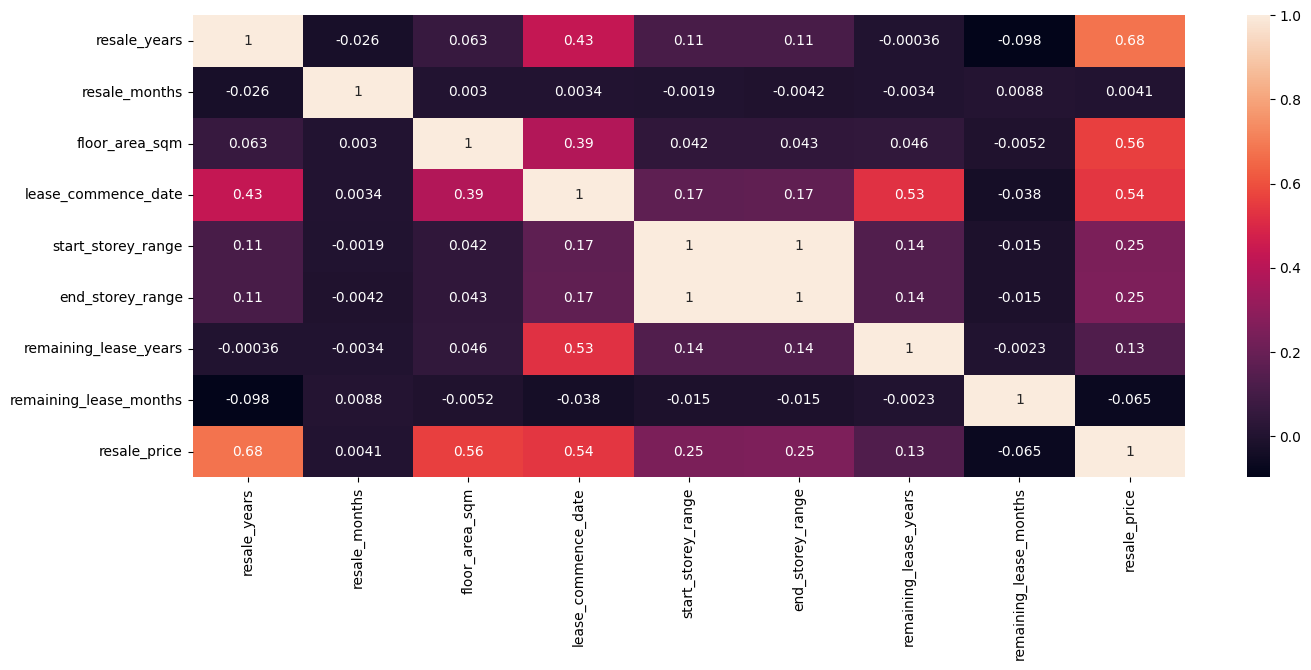

In [48]:
co = new_df[['resale_years', 'resale_months','floor_area_sqm', 'lease_commence_date', 'start_storey_range', 'end_storey_range','remaining_lease_years','remaining_lease_months' ,'resale_price']]
plt.figure(figsize=(16,6))
sns.heatmap(co.corr(),annot=True)
plt.show()

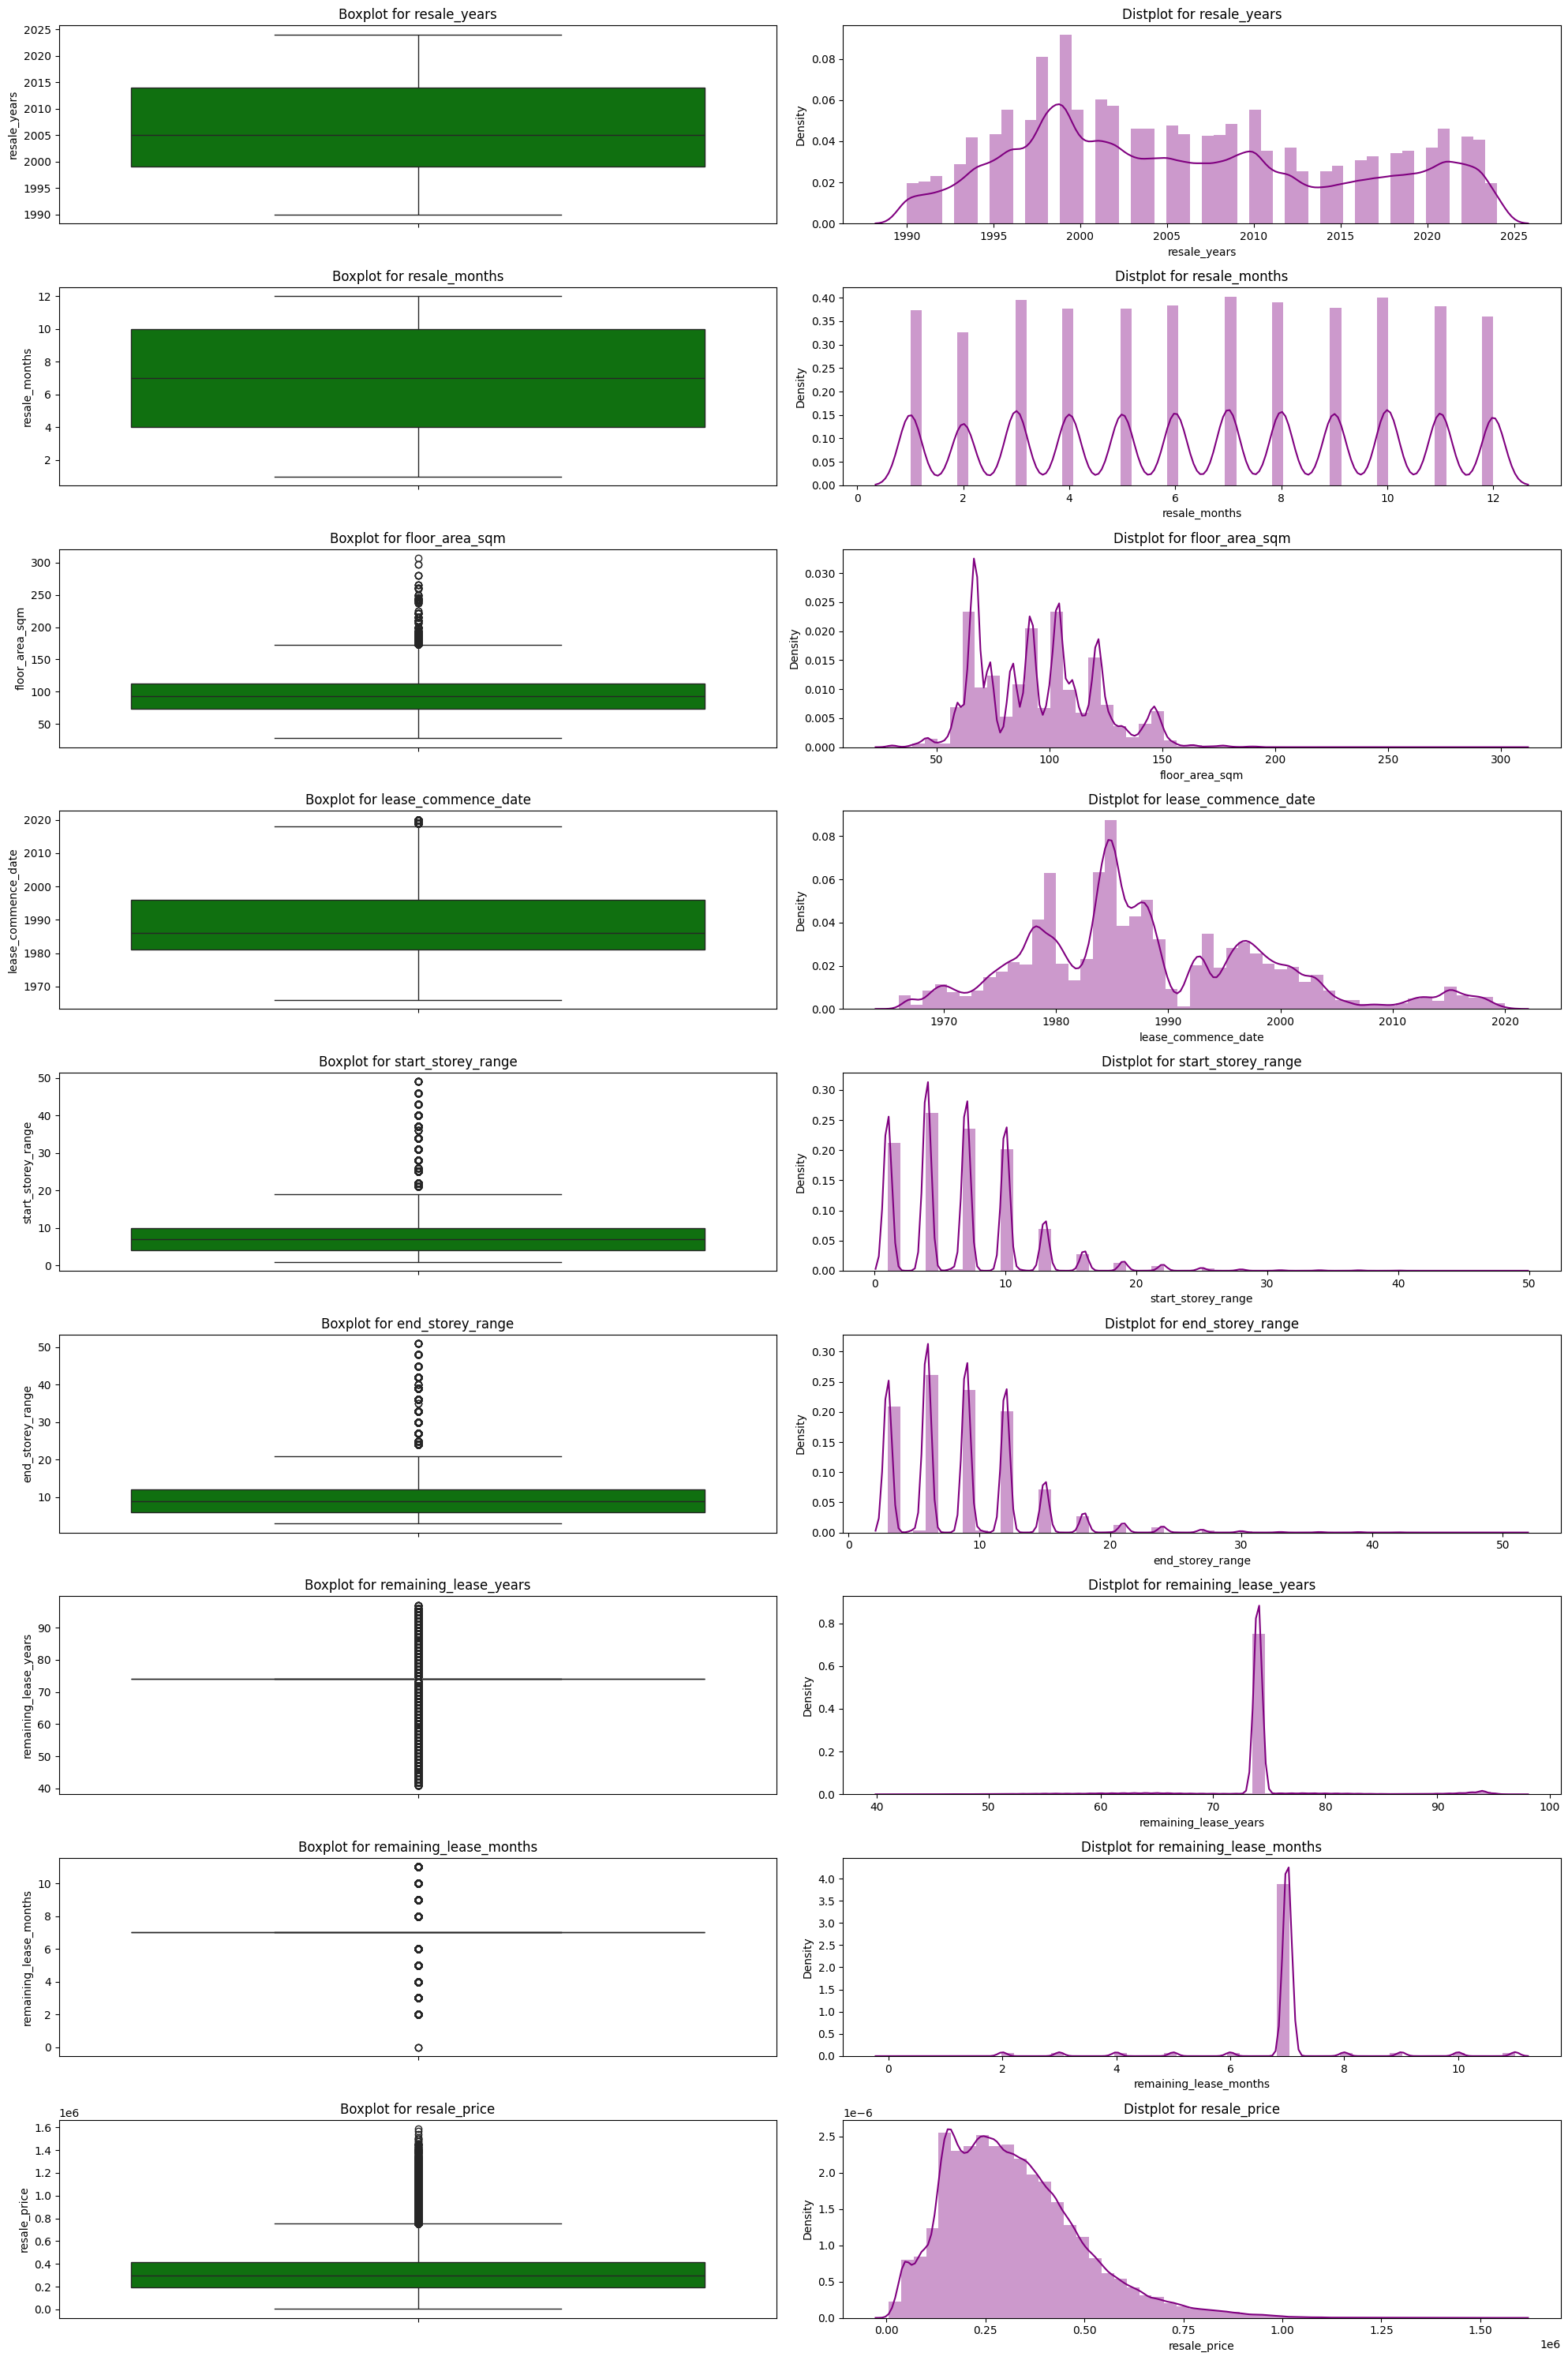

In [49]:
# Creating figure with subplots
fig,axes = plt.subplots(9,2,figsize=(20,30))


#Years
#boxplot
sns.boxplot(data=new_df['resale_years'],ax=axes[0,0],color="green")
axes[0,0].set_title("Boxplot for resale_years")
#distplot
sns.distplot(a=new_df['resale_years'],ax=axes[0,1],color="purple")
axes[0,1].set_title("Distplot for resale_years")

#Months
#boxplot
sns.boxplot(data=new_df['resale_months'],ax=axes[1,0],color="green")
axes[1,0].set_title("Boxplot for resale_months")
#distplot
sns.distplot(a=new_df['resale_months'],ax=axes[1,1],color="purple")
axes[1,1].set_title("Distplot for resale_months")

#Floor_Area_Sqm
#boxplot
sns.boxplot(data=new_df['floor_area_sqm'],ax=axes[2,0],color="green")
axes[2,0].set_title("Boxplot for floor_area_sqm")
#distplot
sns.distplot(a=new_df['floor_area_sqm'],ax=axes[2,1],color="purple")
axes[2,1].set_title("Distplot for floor_area_sqm")

#Lease_Commence_date
#boxplot
sns.boxplot(data=new_df['lease_commence_date'],ax=axes[3,0],color="green")
axes[3,0].set_title("Boxplot for lease_commence_date")
#distplot
sns.distplot(a=new_df['lease_commence_date'],ax=axes[3,1],color="purple")
axes[3,1].set_title("Distplot for lease_commence_date")

#Start_Storey_Range
#boxplot
sns.boxplot(data=new_df['start_storey_range'],ax=axes[4,0],color="green")
axes[4,0].set_title("Boxplot for start_storey_range")
#distplot
sns.distplot(a=new_df['start_storey_range'],ax=axes[4,1],color="purple")
axes[4,1].set_title("Distplot for start_storey_range")

#End_Storey_Range
#boxplot
sns.boxplot(data=new_df['end_storey_range'],ax=axes[5,0],color="green")
axes[5,0].set_title("Boxplot for end_storey_range")
#distplot
sns.distplot(a=new_df['end_storey_range'],ax=axes[5,1],color="purple")
axes[5,1].set_title("Distplot for end_storey_range")

#Remaining_Lease_Years
#boxplot
sns.boxplot(data=new_df['remaining_lease_years'],ax=axes[6,0],color="green")
axes[6,0].set_title("Boxplot for remaining_lease_years")
#distplot
sns.distplot(a=new_df['remaining_lease_years'],ax=axes[6,1],color="purple")
axes[6,1].set_title("Distplot for remaining_lease_years")

#Remaining_lease_Months
#boxplot
sns.boxplot(data=new_df['remaining_lease_months'],ax=axes[7,0],color="green")
axes[7,0].set_title("Boxplot for remaining_lease_months")
#distplot
sns.distplot(a=new_df['remaining_lease_months'],ax=axes[7,1],color="purple")
axes[7,1].set_title("Distplot for remaining_lease_months")

#Resale_price
#boxplot
sns.boxplot(data=new_df['resale_price'],ax=axes[8,0],color="green")
axes[8,0].set_title("Boxplot for resale_price")
#distplot
sns.distplot(a=new_df['resale_price'],ax=axes[8,1],color="purple")
axes[8,1].set_title("Distplot for resale_price")


plt.tight_layout()
plt.show()

In [50]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
resale_years,927769.0,2006.180235,9.328823,1990.0,1999.0,2005.0,2014.0,2024.0
resale_months,927769.0,6.550306,3.412481,1.0,4.0,7.0,10.0,12.0
town,927769.0,13.653670,8.795451,0.0,5.0,13.0,23.0,26.0
flat_type,927769.0,3.013895,0.948373,0.0,2.0,3.0,4.0,6.0
street_name,927769.0,285.969889,181.601262,0.0,122.0,278.0,460.0,583.0
floor_area_sqm,927769.0,95.690326,25.824063,28.0,73.0,93.0,113.0,307.0
flat_model,927769.0,8.963091,3.926797,0.0,5.0,8.0,12.0,20.0
lease_commence_date,927769.0,1988.281130,10.668351,1966.0,1981.0,1986.0,1996.0,2020.0
start_storey_range,927769.0,6.682965,4.822655,1.0,4.0,7.0,10.0,49.0
end_storey_range,927769.0,8.697706,4.822647,3.0,6.0,9.0,12.0,51.0


In [51]:
outlier_columns = new_df[['floor_area_sqm','start_storey_range','end_storey_range','remaining_lease_years','remaining_lease_months','resale_price']]
removing_outliers = outlier_columns.copy()

for column in outlier_columns:
   Q1 = outlier_columns[column].quantile(0.25)
   Q3 = outlier_columns[column].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   removing_outliers = removing_outliers[(removing_outliers[column] >= lower_bound) & (removing_outliers[column] <= upper_bound)]
   
print(removing_outliers.head())

   floor_area_sqm  start_storey_range  end_storey_range  \
0            31.0                  10                12   
1            31.0                   4                 6   
2            31.0                  10                12   
3            31.0                   7                 9   
4            73.0                   4                 6   

   remaining_lease_years  remaining_lease_months  resale_price  
0                   74.0                     7.0        9000.0  
1                   74.0                     7.0        6000.0  
2                   74.0                     7.0        8000.0  
3                   74.0                     7.0        6000.0  
4                   74.0                     7.0       47200.0  


In [52]:
skew_columns = ['resale_years','floor_area_sqm','lease_commence_date', 'start_storey_range', 'end_storey_range','remaining_lease_years', 'remaining_lease_months','resale_price']

# Calculate skewness for each column in outlier_columns
skewness = new_df[skew_columns].skew()
print("Skewness of selected columns:")
print(skewness)

Skewness of selected columns:
resale_years              0.294222
floor_area_sqm            0.366057
lease_commence_date       0.647606
start_storey_range        1.352428
end_storey_range          1.353121
remaining_lease_years     0.006830
remaining_lease_months   -1.009114
resale_price              0.942481
dtype: float64


In [53]:
new_df['start_storey_range_log'] = np.log(new_df['start_storey_range'])
new_df['end_storey_range_log'] = np.log(new_df['end_storey_range'])
new_df['resale_price_log'] = np.log(new_df['resale_price'])

print("Skewness after transformation:")
print(new_df['start_storey_range_log'].skew())
print(new_df['end_storey_range_log'].skew())
print(new_df['resale_price_log'].skew())

Skewness after transformation:
-0.6659160104144707
-0.22911236871010063
-0.9237608100954824


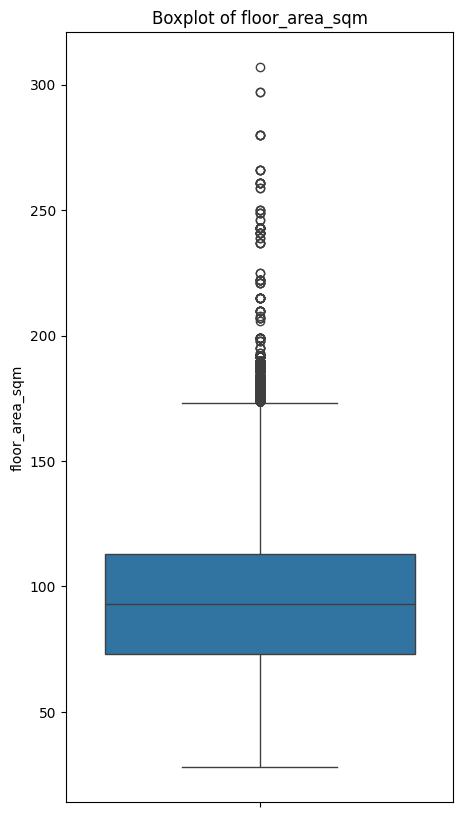

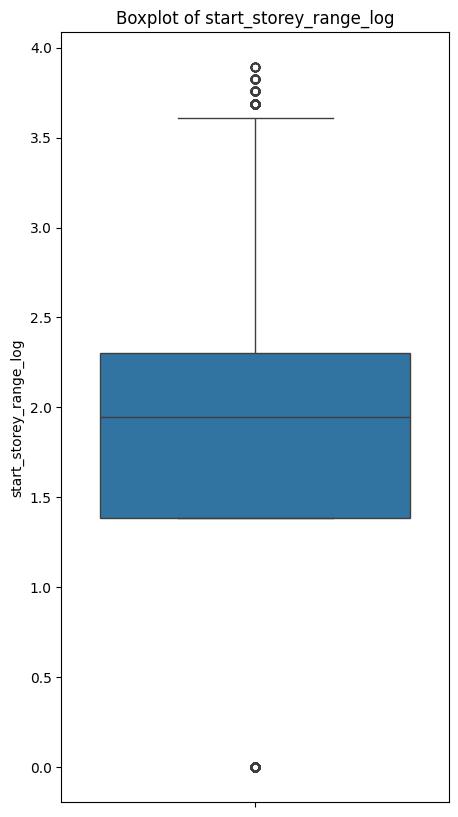

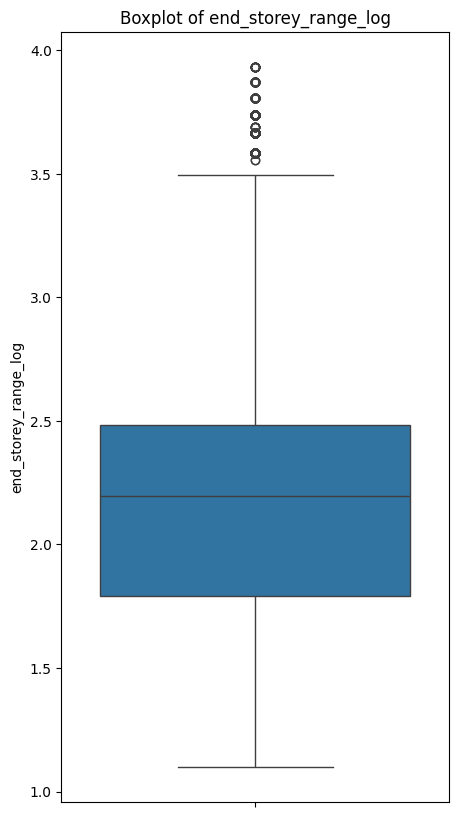

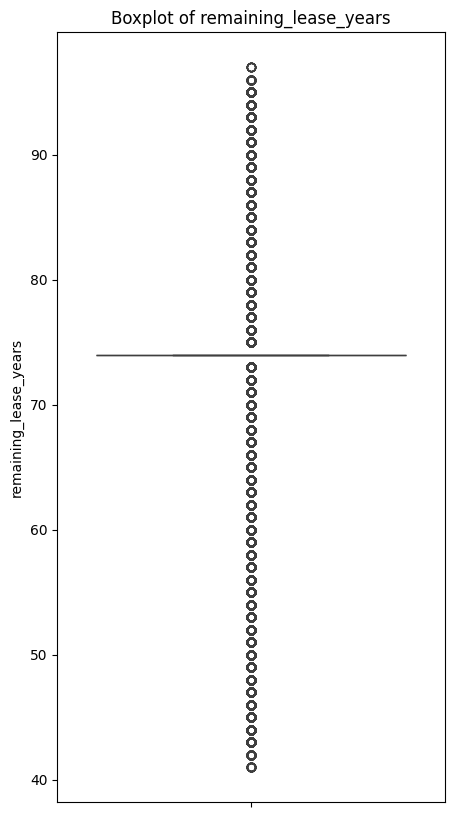

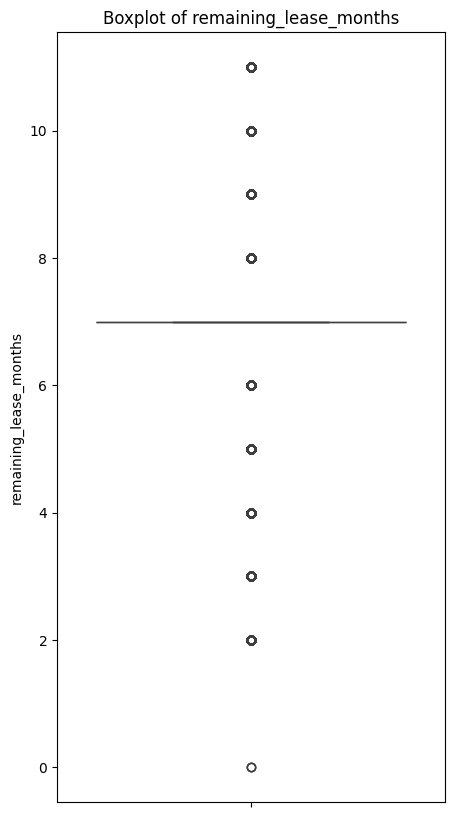

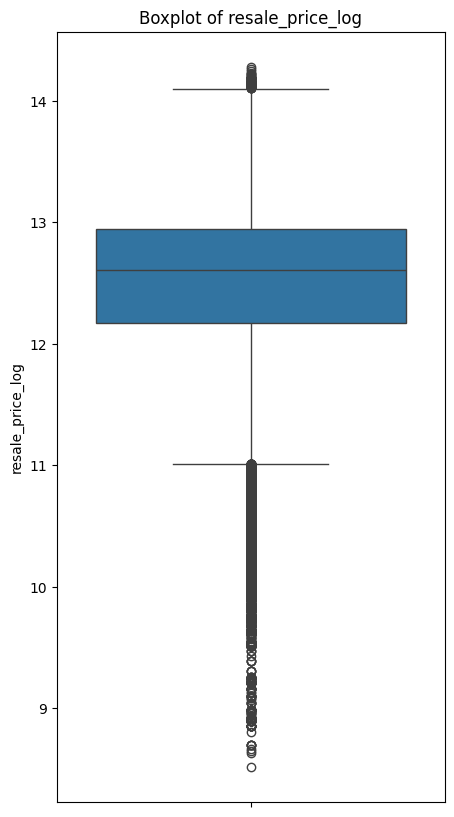

In [54]:
outlier_columns = new_df[['floor_area_sqm','start_storey_range_log','end_storey_range_log','remaining_lease_years','remaining_lease_months','resale_price_log']]

for col in outlier_columns.columns:
    plt.figure(figsize=(5,10))
    sns.boxplot(y=new_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

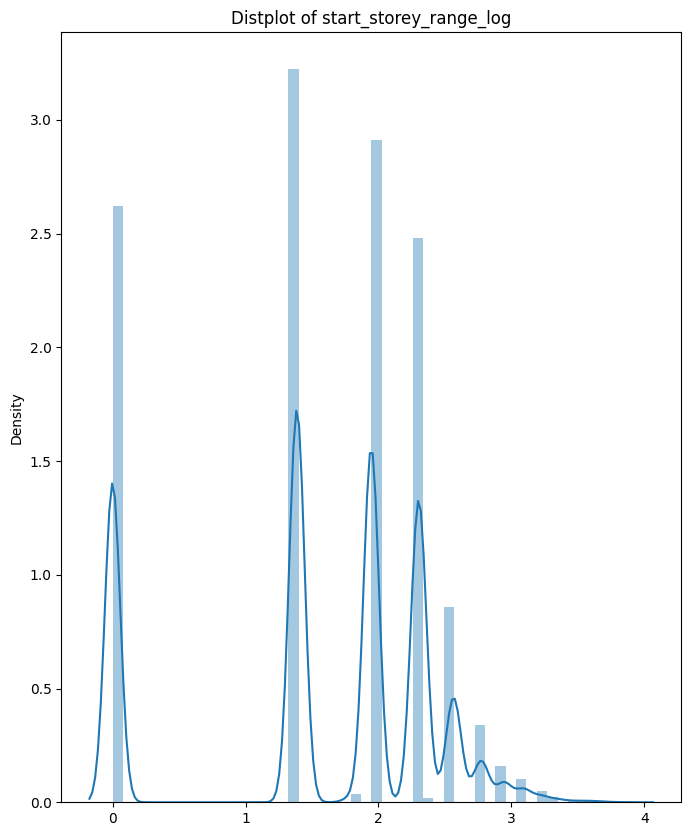

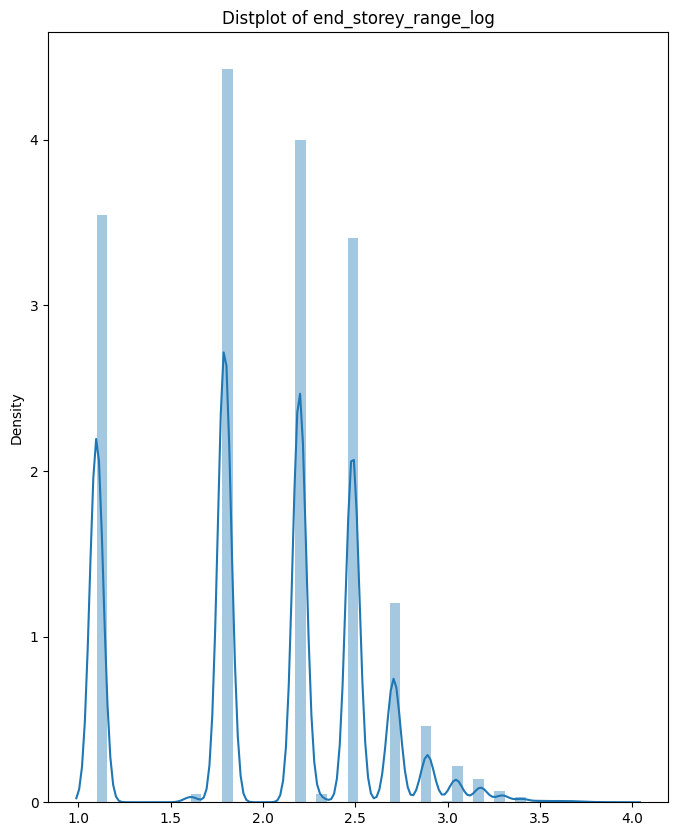

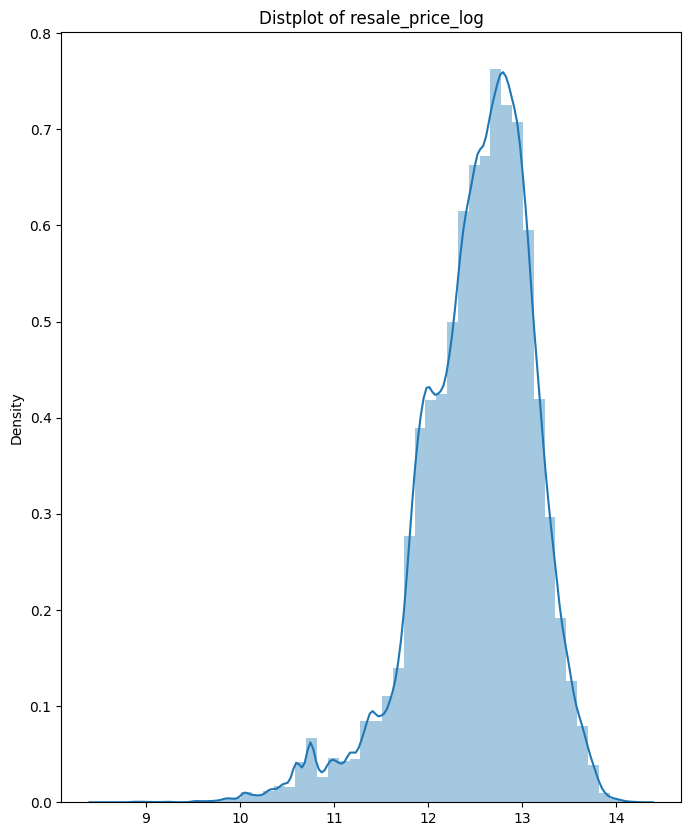

In [55]:
transform_columns = new_df[['start_storey_range_log', 'end_storey_range_log','resale_price_log']]

for col in transform_columns.columns:
   plt.figure(figsize=(8,10))
   sns.distplot(x=new_df[col])
   plt.title(f'Distplot of {col}')
   plt.show()

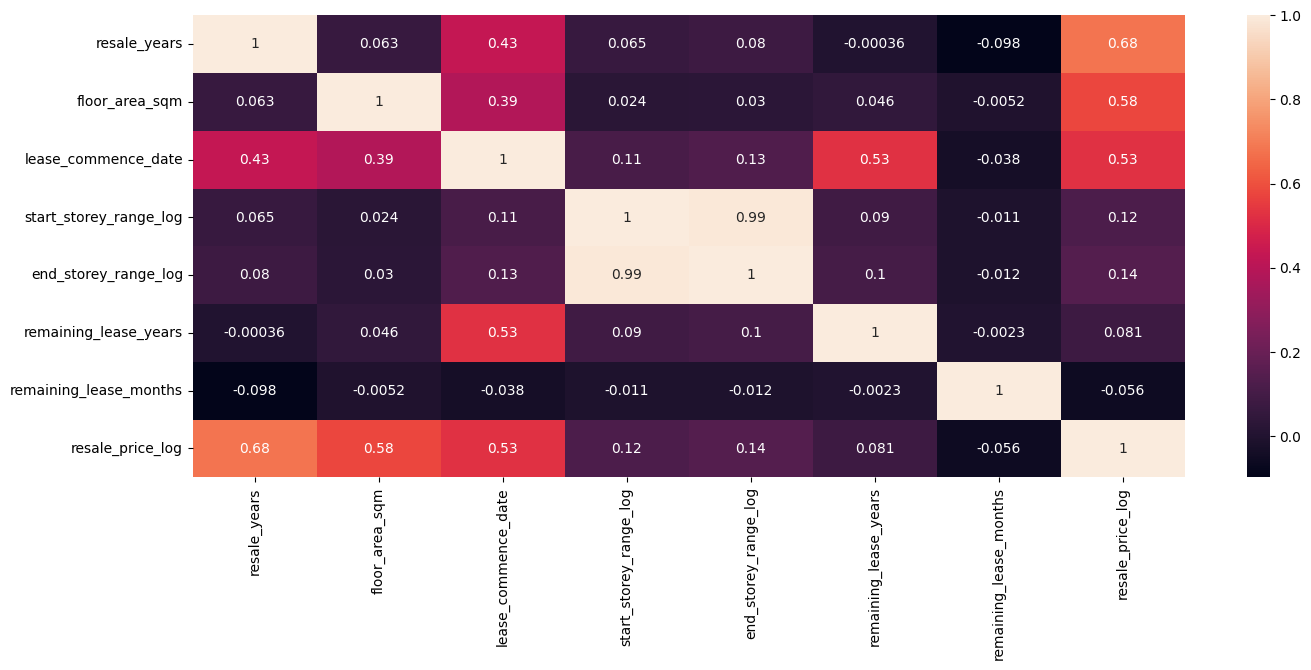

In [56]:
co = new_df[['resale_years','floor_area_sqm','lease_commence_date', 'start_storey_range_log', 'end_storey_range_log','remaining_lease_years','remaining_lease_months' ,'resale_price_log']]
plt.figure(figsize=(16,6))
sns.heatmap(co.corr(),annot=True)
plt.show()

## Scaling

In [57]:
X = new_df[['resale_years','resale_months','town','flat_type','street_name','floor_area_sqm','flat_model','lease_commence_date','start_storey_range_log','end_storey_range_log','remaining_lease_years','remaining_lease_months']]
y = new_df[['resale_price']]

#Standard Scaler
ss = StandardScaler()
X_scaler = ss.fit_transform(X)

#Train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.3,random_state=42)

In [58]:
print("Shape of y before reshaping:", y.shape)
y = np.array(y).reshape(-1)

Shape of y before reshaping: (927769, 1)


In [59]:
print("Shape of y after reshaping:", y.shape)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

Shape of y after reshaping: (927769,)
(649438, 12) (278331, 12) (649438, 1) (278331, 1)


In [60]:
import pickle
file_path7='scaling_sing.pkl'
with open(file_path7, 'wb') as file:
    pickle.dump(ss, file)
print(f'Pickle file created: {file_path7}')

Pickle file created: scaling_sing.pkl


In [61]:
with open('scaling_sing.pkl', 'rb') as file:
    ss = pickle.load(file)

ss

StandardScaler()

## Model Evaluation

In [62]:
#Linear Regression
lr = LinearRegression()

#Fitting in the model
lr.fit(X_train,y_train)

#Predict
lr_pred = lr.predict(X_test)

#Evaluation Metrics
lr_mse = mean_squared_error(y_test,lr_pred)
lr_mae = mean_absolute_error(y_test,lr_pred)
lr_r2 = r2_score(y_test,lr_pred)

print(f"Mean Squared Error  : {lr_mse}")
print(f"Mean Absolute Error : {lr_mae}")
print(f"R2 Score : {lr_r2}")


Mean Squared Error  : 0.08843426224997435
Mean Absolute Error : 0.22292472612074907
R2 Score : 0.7637162040284415


In [63]:
xr = XGBRegressor()

#Fitting in the model
xr.fit(X_train,y_train)

#Predict
xr_pred = xr.predict(X_test)

#Evaluation Metrics
xr_mse = mean_squared_error(y_test,xr_pred)
xr_mae = mean_absolute_error(y_test,xr_pred)
xr_r2 = r2_score(y_test,xr_pred)

print(f"Mean Squared Error  : {xr_mse}")
print(f"Mean Absolute Error : {xr_mae}")
print(f"R2 Score : {xr_r2}")

Mean Squared Error  : 0.006769481900460406
Mean Absolute Error : 0.059532819537695056
R2 Score : 0.9819129052529411


In [64]:
#Random Forest Regression
rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)

#Fitting in the model
rf.fit(X_train,y_train)

#Predict
rf_pred = rf.predict(X_test)

#Evaaluation Metrics
rf_mse = mean_squared_error(y_test,rf_pred)
rf_mae = mean_absolute_error(y_test,rf_pred)
rf_r2 = r2_score(y_test,rf_pred)

print(f"Mean Squared Error : {rf_mse}")
print(f"Mean Absolute Error : {rf_mae}")
print(f"R2 Score : {rf_r2}")


Mean Squared Error : 0.0203679658977625
Mean Absolute Error : 0.10711304623592736
R2 Score : 0.9455796862426591


In [65]:
#Decision Tree Regression
dt = DecisionTreeRegressor()

#Fitting in the Model
dt.fit(X_train,y_train)

#Predict
dt_pred = dt.predict(X_test)

#Evaluation Metrics
dt_mse = mean_squared_error(y_test,dt_pred)
dt_mae = mean_absolute_error(y_test,dt_pred)
dt_r2 = r2_score(y_test,dt_pred)

print(f"Mean Squared Error : {dt_mse}")
print(f"Mean Absolute Error : {dt_mae}")
print(f"R2 Score : {dt_r2}")

Mean Squared Error : 0.011056904128719831
Mean Absolute Error : 0.07071046858488077
R2 Score : 0.9704575216351932


In [66]:
new_df.iloc[100000]

resale_years                1995.000000
resale_months                  9.000000
town                           0.000000
flat_type                      4.000000
street_name                   14.000000
floor_area_sqm               118.000000
flat_model                     5.000000
lease_commence_date         1981.000000
start_storey_range            22.000000
end_storey_range              24.000000
remaining_lease_years         74.000000
remaining_lease_months         7.000000
resale_price              388000.000000
start_storey_range_log         3.091042
end_storey_range_log           3.178054
resale_price_log              12.868761
Name: 100000, dtype: float64

In [67]:
np.exp(12.868761)

388000.14798112866

In [68]:
user_data = np.array([[1995,9,0,4,14,118,5,1981,3.091042,3.178054,74,7]])

# Standardize the user data if necessary
scaler = StandardScaler()
user_data_scaled = scaler.fit_transform(user_data)

# Make a prediction
y_pred = rf.predict(user_data_scaled)
print(y_pred)

[12.42798866]


In [69]:
np.exp(12.42798866)

249693.3040676947

In [70]:
import pickle
file_path5='XGBRegressor.pkl'
with open(file_path5, 'wb') as file:
    pickle.dump(xr, file)
print(f'Pickle file created: {file_path5}')

Pickle file created: XGBRegressor.pkl


In [71]:
with open('XGBRegressor.pkl', 'rb') as file:
    xr = pickle.load(file)

xr

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
import pickle
file_path6='RandomForestRegressor.pkl'
with open(file_path6, 'wb') as file:
    pickle.dump(rf, file)
print(f'Pickle file created: {file_path6}')

Pickle file created: RandomForestRegressor.pkl


In [73]:
with open('RandomForestRegressor.pkl', 'rb') as file:
    rf = pickle.load(file)

rf

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)